In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [121]:
df = pd.read_csv('data2.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [123]:
df.shape

((10841, 13), pandas.core.frame.DataFrame)

In [124]:
df.info(), type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


(None, pandas.core.frame.DataFrame)

In [125]:
df.isnull().sum()

(App                  0
 Category             0
 Rating            1474
 Reviews              0
 Size                 0
 Installs             0
 Type                 1
 Price                0
 Content Rating       1
 Genres               0
 Last Updated         0
 Current Ver          8
 Android Ver          3
 dtype: int64,
 pandas.core.frame.DataFrame)

### observation
The dataset has missing values

In [126]:
df['Reviews'].unique()

(array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object),
 pandas.core.frame.DataFrame)

In [128]:
df[~df['Reviews'].str.isnumeric()]

(                                           App Category  Rating Reviews  \
 10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   
 
          Size Installs Type     Price Content Rating             Genres  \
 10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   
 
       Last Updated Current Ver Android Ver  
 10472       1.0.19  4.0 and up         NaN  ,
 pandas.core.frame.DataFrame)

In [129]:
df = df.drop(df.index[10472])

In [130]:
df['Reviews'] = df['Reviews'].astype('int')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [136]:
df['Size'] = df['Size'].str.replace('M','000')

In [137]:
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = df['Size'].replace('Varies with device',np.nan)
df['Size'] = df['Size'].astype(float)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [139]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [140]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [144]:
char_to_remove = ['$', ',', '+']
cols_to_clean = ['Price', 'Installs']
for item in char_to_remove:
    for col in cols_to_clean:
        df[col] = df[col].astype(str).str.replace(item, '')

In [146]:
df['Installs'].unique(), df['Price'].unique()

(array(['10000', '500000', '5000000', '50000000', '100000', '50000',
        '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
        '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object),
 array(['0.0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
        '3.49', '1.99', '9.99', '7.49', '0.99', '9.0', '5.49', '10.0',
        '24.99', '11.99', '79.99', '16.99', '14.99', '1.0', '29.99',
        '12.99', '2.49', '10.99', '1.5', '19.99', '15.99', '33.99',
        '74.99', '39.99', '3.95', '4.49', '1.7', '8.99', '2.0', '3.88',
        '25.99', '399.99', '17.99', '400.0', '3.02', '1.76', '4.84',
        '4.77', '1.61', '2.5', '1.59', '6.49', '1.29', '5.0', '13.99',
        '299.99', '379.99', '37.99', '18.99', '389.99', '19.9', '8.49',
        '1.75', '14.0', '4.85', '46.99', '109.99', '154.99', '3.08',
        '2.59', '4.8', '1.96', '19.4', '3.9', '4.59', '15.46', '3.04',
        '4.29', '2.6', '3.28', '4.6', '28.99', '2.95', '2.9', '1.97',
      

In [147]:
df['Installs'] = df['Installs'].astype(int)
df['Price'] = df['Price'].astype(float)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [151]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Day'] = df['Last Updated'].dt.day
df['Month'] = df['Last Updated'].dt.month
df['Year'] = df['Last Updated'].dt.year

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

In [160]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [161]:
## Dataset has duplicate records
df.drop_duplicates(subset='App', keep='first', inplace=True)

In [162]:
df.shape

(9659, 16)

In [ ]:
##Explore further to understand the data

In [163]:
numeric_features = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("we have {} numerical features: {} ".format(len(numeric_features), numeric_features))
print("we have {} categorical features: {} ".format(len(categorical_features), categorical_features))

we have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year'] 
we have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'] 


In [ ]:
## proportion of count data in each category

In [166]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
---------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271

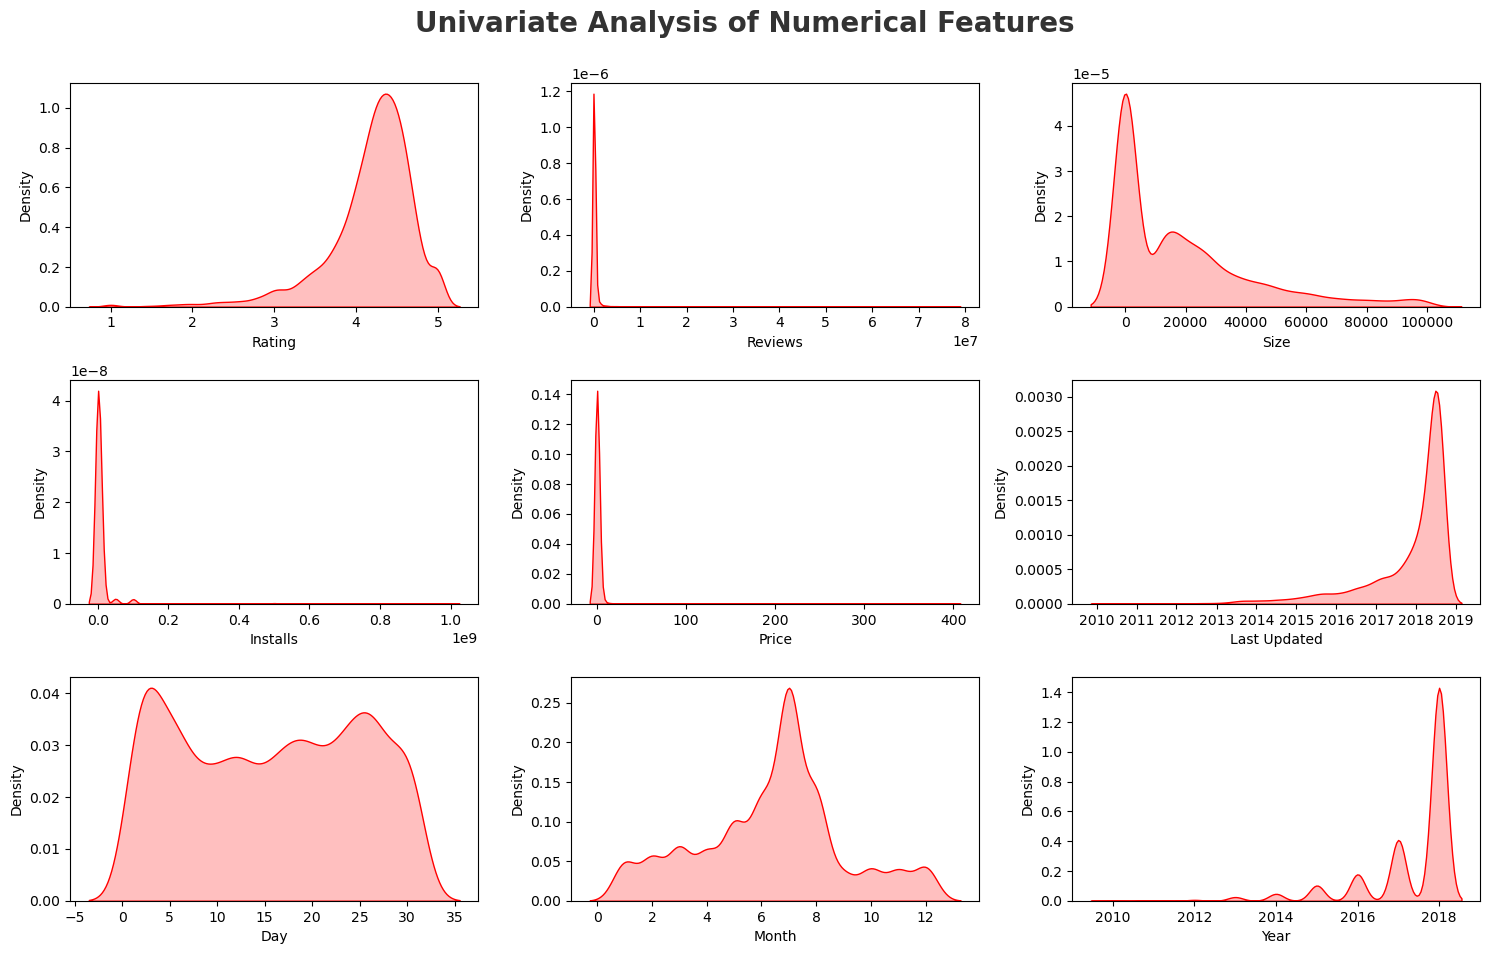

In [168]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [ ]:
## rating and year is left skewed whereas reviews, size, installs and price is right skewed

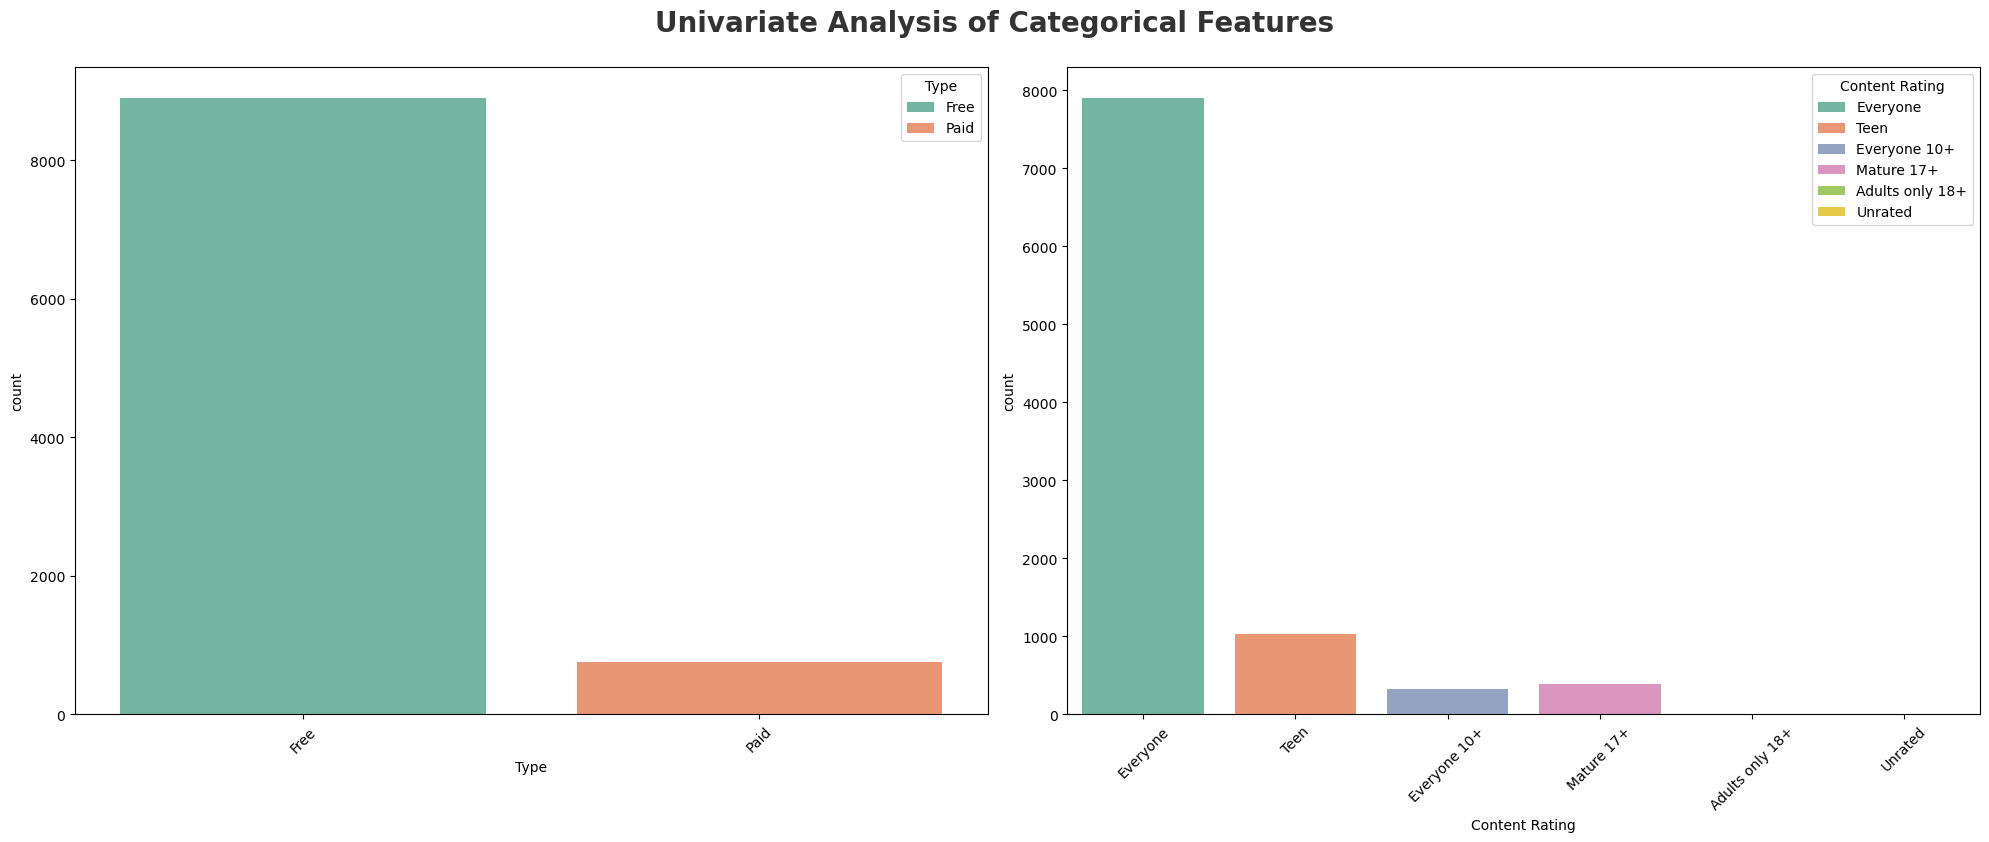

In [173]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2", hue=df[category[i]], legend=True)
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 

<Axes: ylabel='count'>

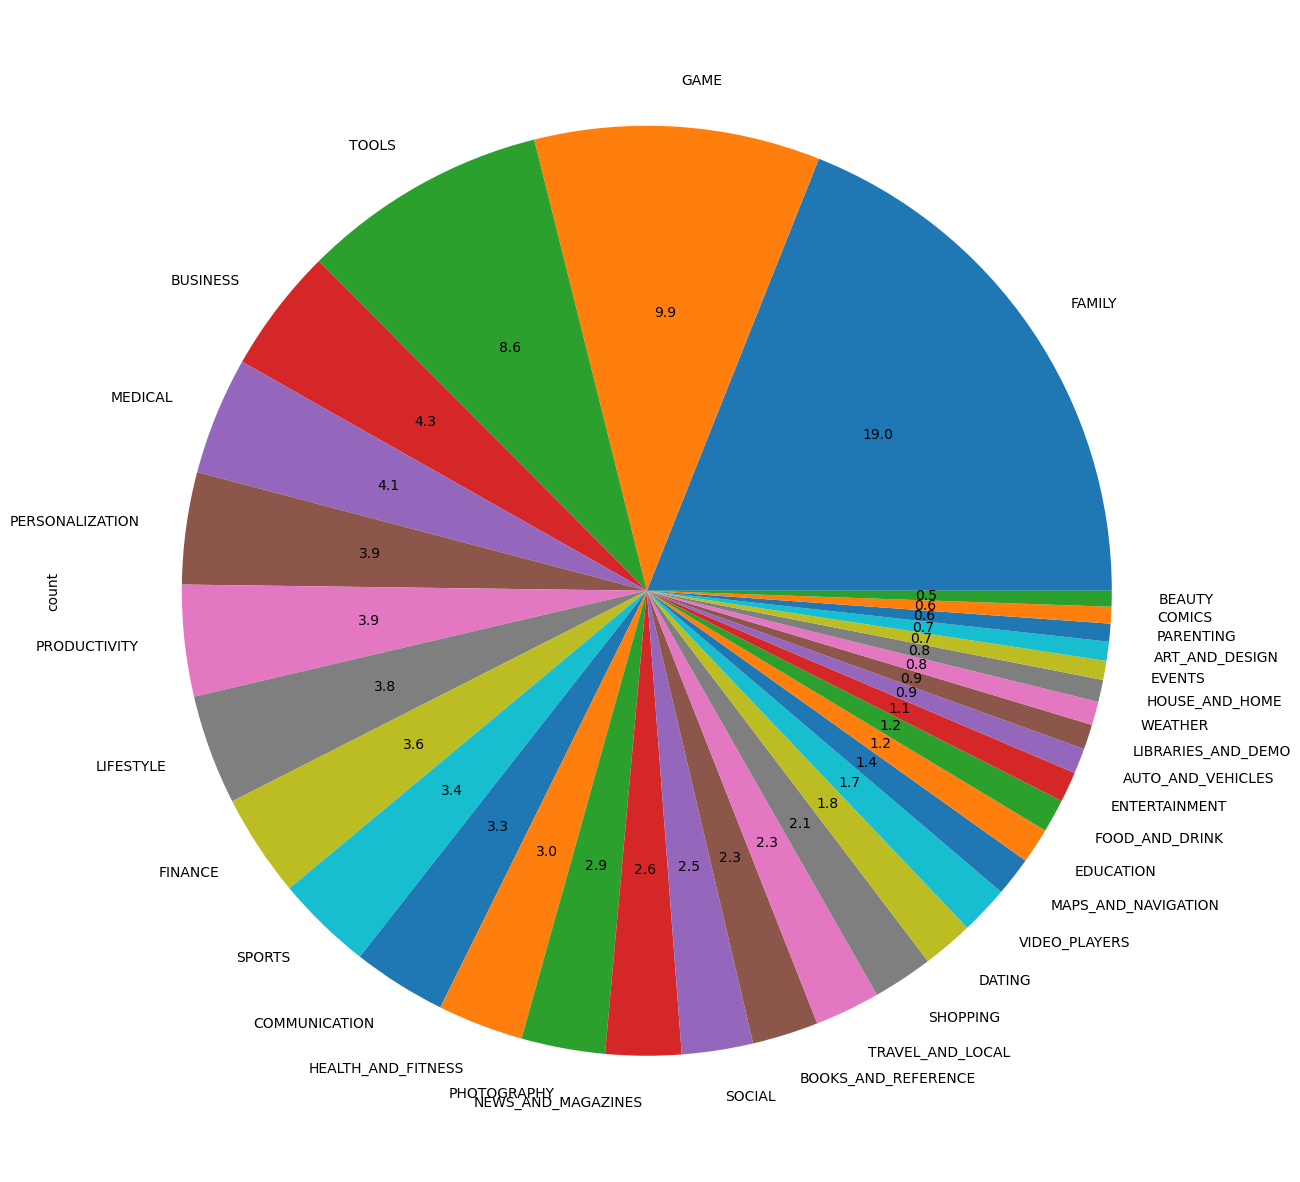

In [174]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')
#most popular category is family

In [177]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [178]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\KrishnaDas\AppData\Local\Temp\ipykernel_26064\3190256636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category['count'].head(10), y=category.index[:10], palette='hls')


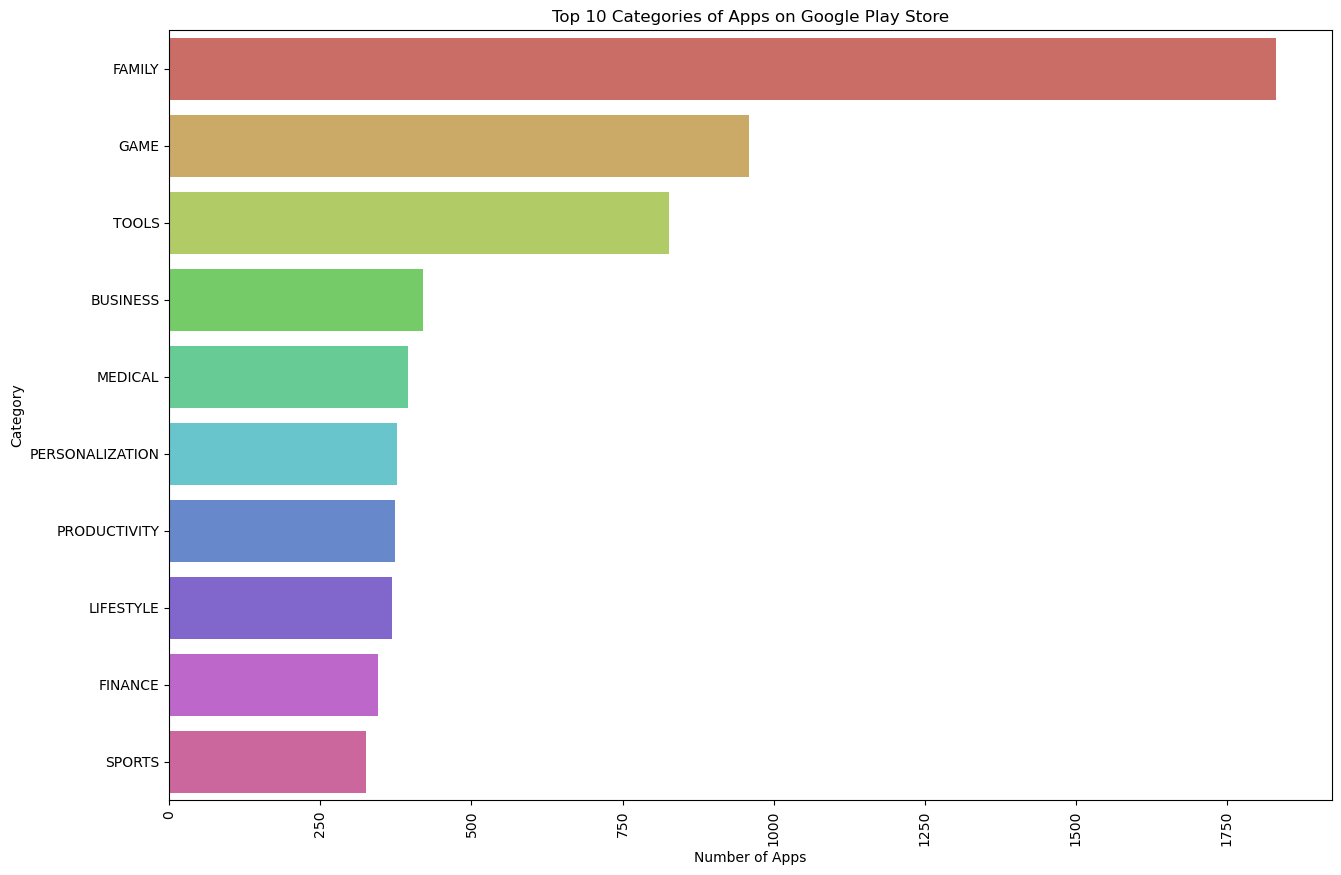

In [183]:
#plotting for top 10 categories
plt.figure(figsize=(15, 10))
sns.barplot(x=category['count'].head(10), y=category.index[:10], palette='hls')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.title('Top 10 Categories of Apps on Google Play Store')
plt.show()

In [184]:
#category with largest number of installs
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
category_installs

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

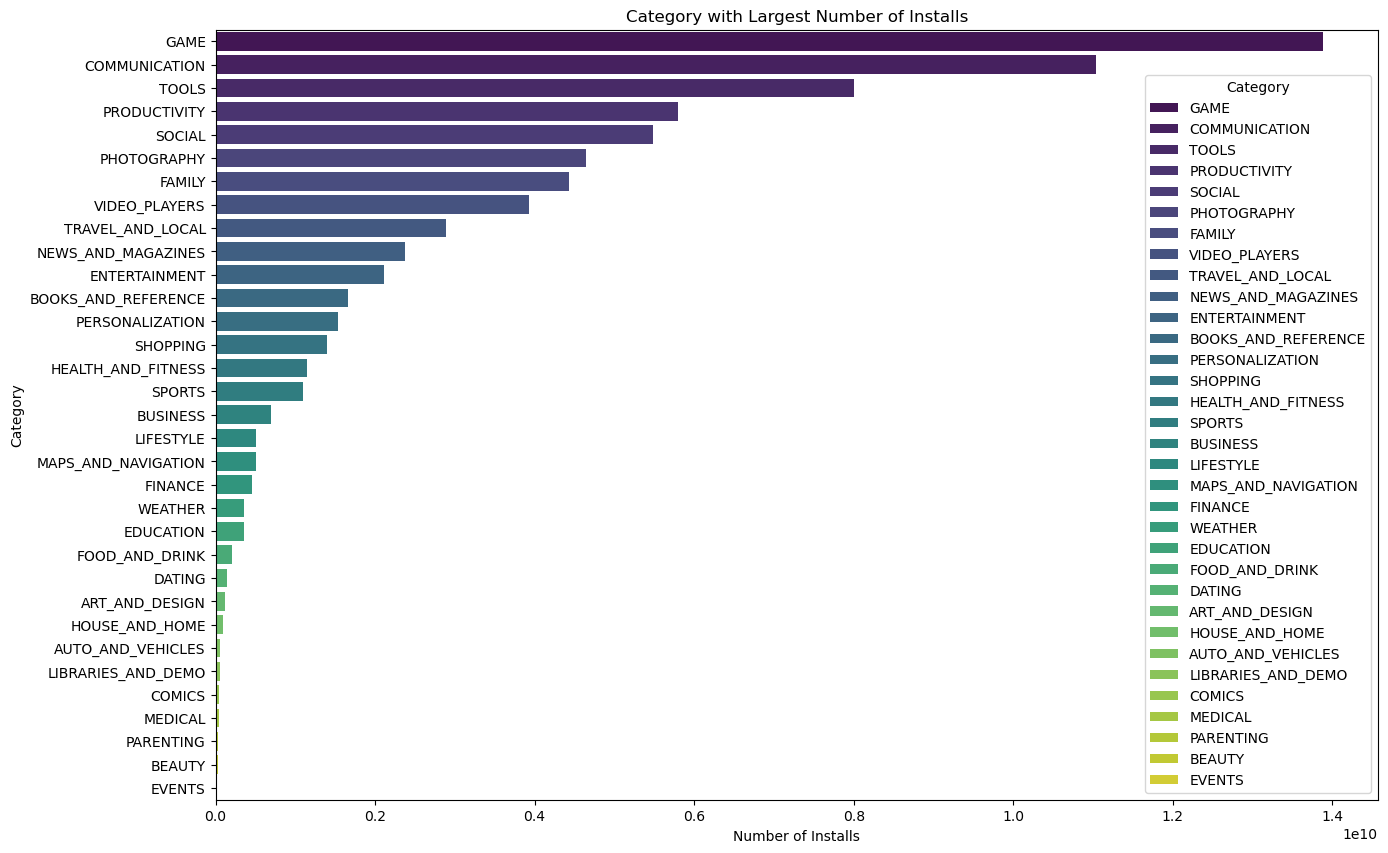

In [187]:
# Barplot for category with largest number of installs
plt.figure(figsize=(15, 10))
sns.barplot(x=category_installs, y=category_installs.index, palette='viridis', hue=category_installs.index, legend=True)
plt.xlabel('Number of Installs')
plt.ylabel('Category')
plt.title('Category with Largest Number of Installs')
plt.show()

In [188]:
# Top 5 most installed apps in each category
top_5 = df.groupby('Category')['Installs'].nlargest(5)
top_5

Category            
ART_AND_DESIGN  3       50000000
                12      10000000
                19      10000000
                42      10000000
                45      10000000
                          ...   
WEATHER         3626    50000000
                3628    50000000
                3649    50000000
                4725    50000000
                3630    10000000
Name: Installs, Length: 165, dtype: int32

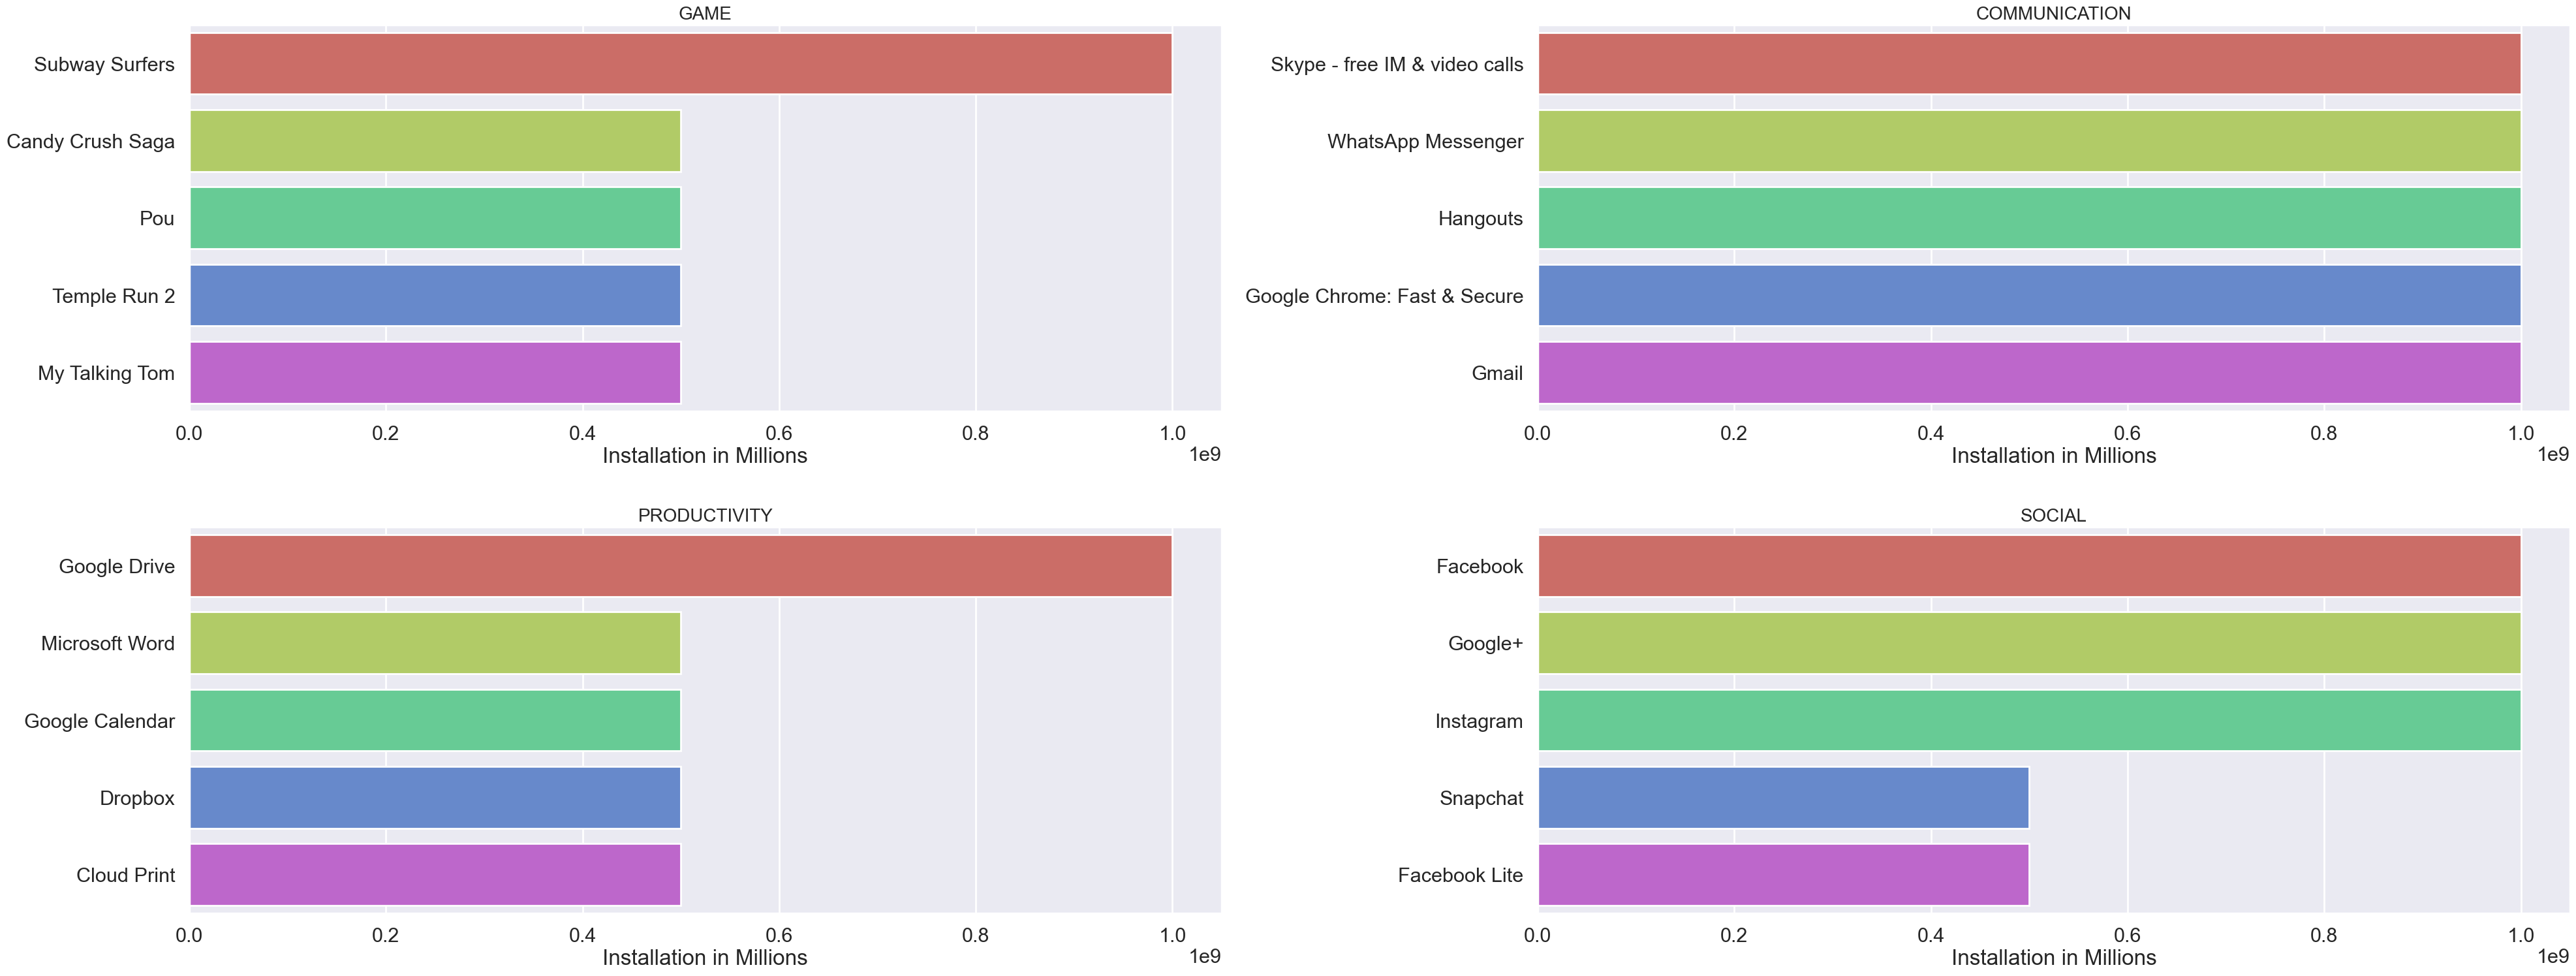

In [194]:
# #plot for top 5 most installed apps in each category
# plt.figure(figsize=(15, 10))
# sns.barplot(x=top_5, y=top_5.index, palette='viridis', hue=top_5.index, legend=True)
# plt.xlabel('Number of Installs')
# plt.ylabel('Category')
# plt.title('Top 5 most installed apps in each category')
# plt.show()

dfa = df.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App', hue='App', palette='hls')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [195]:
#number of apps with 5 star ratings in each category
five_star = df[df['Rating'] == 5.0].groupby('Category')['App'].count().sort_values(ascending=False)
five_star

Category
FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS_AND_MAGAZINES      7
SHOPPING                6
BOOKS_AND_REFERENCE     6
EVENTS                  6
DATING                  6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
LIBRARIES_AND_DEMO      2
FOOD_AND_DRINK          2
COMICS                  2
PARENTING               1
ART_AND_DESIGN          1
Name: App, dtype: int64

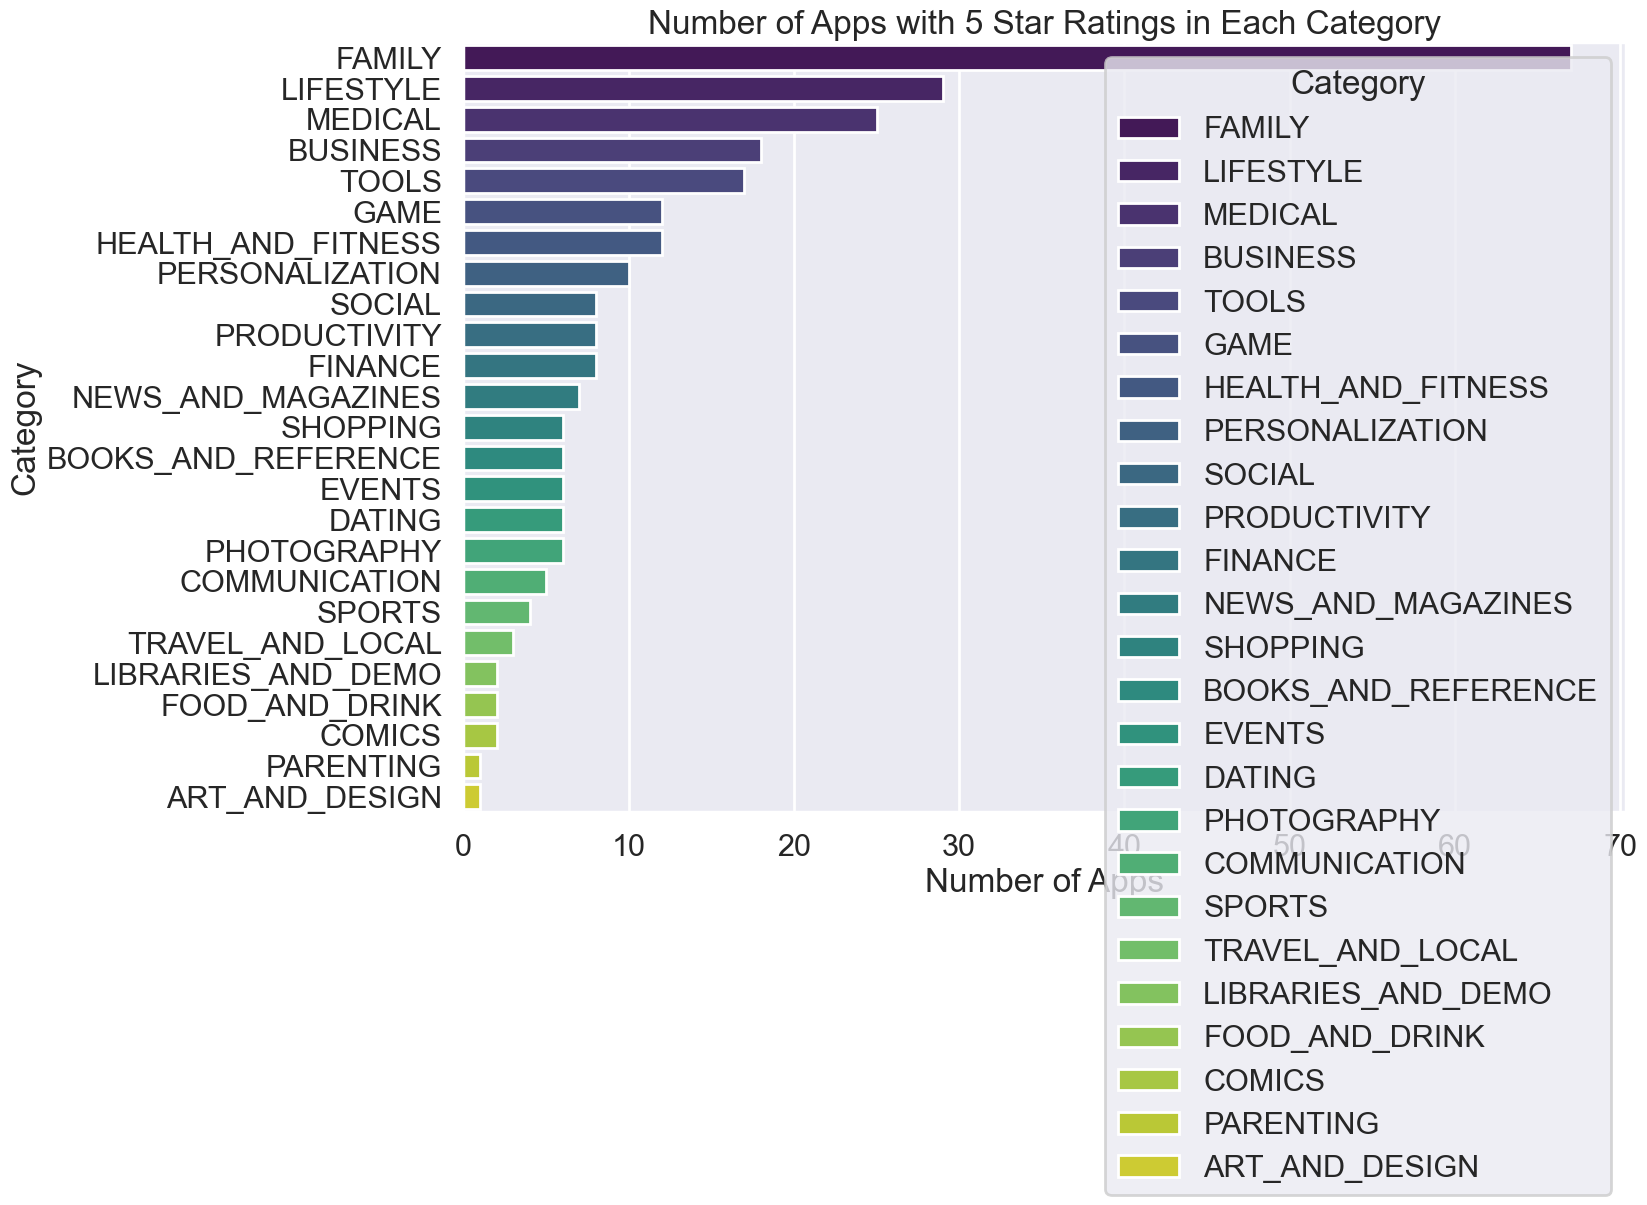

In [197]:
#plot for number of apps with 5 star ratings in each category
plt.figure(figsize=(15, 10))
sns.barplot(x=five_star, y=five_star.index, palette='viridis', hue=five_star.index, legend=True)
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Number of Apps with 5 Star Ratings in Each Category')
plt.show()